# Subway Data Analysis

## Introduction

The NYC public transportantion system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.


For this project, we will only use the information available at: http://web.mta.info/developers/turnstile.html.




# About this project

For this project, you will apply the knowledge acquired in the first month of this course. We will practice basic data acquisition and data cleaning tasks to find out fundamental stuff about the data using what we learned in the Statistics course. 

The goal of this project is to explore the relationship between data from the NYC Subway turnstiles and the city weather. For this, besides data from the subway, we will also need data from the weather in NYC. 

Here are the main points that will be considered in this work:

- Gathering data from the Internet
- Using Statistics for Data Analysis
- Data handling and simple graphics creation with `Pandas`

*How to find help*: We suggest that you try the following channels, in the following order:

| Type of Question\Channels    	| Google 	| Forum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Pandas and Python Programming 	| 1      	| 2     	| 3     	|       	|
| Projects Requiriments         	|        	| 1     	| 2     	| 3     	|
| Projects Specific Parts       	|        	| 1     	| 2     	| 3     	|

Here is the address for each of these channels:

- Forum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [Big Data Foundations](https://goo.gl/4K7LWK)
- Email: india@udacity.com

**The student is expected to submit this report including:**

- All TODO's completed, as they are crucial for the code to run accordingly
- The ipynb file, exported as html

To submit this project, go to the [classroom](https://coco.udacity.com/nanodegrees/nd100-inbig/locale/en-us/versions/1.0.0/parts/469348/modules/469702/lessons/469703/project), and submit your zipped `.ipynb` and html.

# Reminders

Before we start, there are a few things you must have in mind while using iPython notebooks:

- Remember you can see, in the left side of a code cell, when was the last time it ran, if there is a number inside the keys.
- When starting a new session in the notebook, please make sure to run all cells up to the point where you last left it. Even if the output can still be viewed from the moment you ran your cells in the previews session, the kernel starts in a new state, so you will need to reload all data, etc. in a new session.
- The previous point is useful to have in mind if your answers do not match what is expected from the quizzes in the classroom. Try reloading the data and running all processing steps, one by one, to make sure you're working with the same variables and data from each step of the quizz.

## Session 1 - Data Gathering

### *Exercise 1.1*

Let's do it!! Now it's your turn to gather data. Please write bellow a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from June 2017. The file must be named turnstile_100617.txt, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the **urllib** library to open and redeem a webpage. Use the command below, where **url** is the webpage path to the following file:

```python
u = urllib.urlopen(url)
html = u.read()
```

Use the **BeautifulSoup** library to search for the link to the file you want to donwload in the page. Use the command below to create your *soup* object and search for all 'a' tags in the document:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

A tip to only download the files from June is to check data in the name of the file. For instance, to donwload the 17/06/2017 file, please see if the link ends with *"turnstile_170610.txt"*. If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

```python
if '1706' in link.get('href'):
```

Our final tip is to use the command bellow to download the txt file:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Please remember - you first have to load all packages and functions that will be used in your analysys.

In [1]:
import urllib
from bs4 import BeautifulSoup

#your code here

u = urllib.urlopen("http://web.mta.info/developers/turnstile.html")
html = u.read()
soup = BeautifulSoup(html,"html.parser")
filenames = []
for a in soup.find_all('a', href=True):
    if '1706' in a['href']:
        url = "http://web.mta.info/developers/" + a['href']
        filename = a['href'][20:-3]+"csv"
        filenames.append(filename)
        print "Trying to retrieve file " + filename + " from server..."
        try:
            urllib.urlretrieve(url,filename)
            print filename + " is saved."t
        except:
            print "Error fetching file " + filename + " from server!"

Trying to retrieve file turnstile_170624.csv from server...
turnstile_170624.csv is saved.
Trying to retrieve file turnstile_170617.csv from server...
turnstile_170617.csv is saved.
Trying to retrieve file turnstile_170610.csv from server...
turnstile_170610.csv is saved.
Trying to retrieve file turnstile_170603.csv from server...
turnstile_170603.csv is saved.


### *Exercise 1.2*

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file. 

For example, if file_1 has:
line 1...
line 2...

and the other file, file_2, has:
line 3...
line 4...
line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
line 1...
line 2...
line 3...
line 4...
line 5...
import csv

In [4]:
import csv
def create_master_turnstile_file(filenames, output_file):
    try:
        with open(output_file, 'wb') as master_file:
            master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
            for filename in filenames:
                reader=csv.reader(open(filename,'rb'))
                next(reader, None)
                writer = csv.writer(master_file,quoting=csv.QUOTE_ALL)
                for row in reader:
                    writer.writerow(row)
            print "File merged and saved!"
    except:
        print "Error merging and saving file!"
create_master_turnstile_file(filenames, "final_file.csv")

File merged and saved!


### *Exercise 1.3*

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [1]:
import pandas as pd

def filter_by_regular(filename):
    df = pd.read_csv(filename)
    df = (df[df["DESCn"] == 'REGULAR'])
    return df
filter_by_regular("final_file.csv")

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676


### *Exercise 1.4*


The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly
2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be usefull for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [4]:
import pandas as pd

def get_hourly_entries(df):
    df = df.fillna(1)
    df['ENTRIESn_hourly'] = df['ENTRIESn']-df['ENTRIESn'].shift()
    df = df.fillna(0)
    df['ENTRIESn_hourly'] = df['ENTRIESn_hourly'].astype(int)
    return df
df = pd.read_csv("final_file.csv")
get_hourly_entries(df)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,34
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,35
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,120
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,243
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,300
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,168
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,25
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,21
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,117


### *Exercise 1.5*

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn.
For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs he previous line. If there is any NaN, fill it out/replace by 0.



In [5]:
import pandas

def get_hourly_exits(df):
    df = df.fillna(0)
    df['EXITSn_hourly'] = df['EXITSn']-df['EXITSn'].shift()
    df = df.fillna(0)
    df['EXITSn_hourly'] = df['EXITSn_hourly'].astype(int)
    return df
df = pd.read_csv("final_file.csv")
get_hourly_exits(df)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,EXITSn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,30
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,100
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,61
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,52
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,21
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,17
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,69


### *Exercise 1.6*

Given an entry variable that represents time, in the format:
     "00:00:00" (hour: minutes: seconds)
    
Write a function to extract the hour part from the time in the entry variable
And return it as an integer. For example:
         
         1) if hour is 00, your code must return 0
         2) if hour is 01, your code must return 1
         3) if hour is 21, your code must return 21
        
Please return te hour as an integer.


In [14]:
import pandas as pd
def time_to_hour(time):
    hour = time[0:2]
    hour = int(hour)
    return hour
print time_to_hour('00:21:12')
print time_to_hour('01:54:55')
print time_to_hour('21:23:12')

0
1
21


## Exercise 2 - Data Analysis

### *Exercise 2.1*

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data.
We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe. 

Tip: 

Use the command below to read the file:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [15]:
import pandas as pd

filename = "turnstile_data_master_with_weather.csv"
df = pd.read_csv(filename,sep=",")

### *Exercise 2.2*

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column *"rain"* is equal to 1.

Tip: You might think that interpreting numbers as integers or floats might not
     work at first. To handle this issue, it might be useful to convert
     these numbers into integers. You can do this by writting cast (column as integer).
     So, for example, if we want to launch the column maxtempi as an integer, we have to
     write something like cast (maxtempi as integer) = 76, instead of just
     where maxtempi = 76.

In [169]:
def num_rainy_days(df):
    count = 0
    for item in df['rain'].astype(int).iteritems():
        if item[1] == 1:
            count+=1
    return count
num_rainy_days(df)

44104

### *Exercise 2.3*

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature 
     for cloudy days).

In [168]:
def max_temp_aggregate_by_fog(df):
    count = 0
    max_temp = 0
    for item in df['fog'].astype(int).iteritems():
        if item[1] == 1:
            for temp in df['maxtempi'].astype(int).iteritems():
                if temp[1] > max_temp:
                    max_temp = temp[1]
            return max_temp
max_temp_aggregate_by_fog(df)

86

### *Exercise 2.4

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [167]:
import pandas as pd
from datetime import date
import numpy as np
def avg_weekend_temperature(filename):
    mean_temp_weekends = 0
    total = 0
    count = 0
    df = pd.read_csv(filename)
    for date in df['DATEn']:
        year = int(date[:4])
        month = int(date[5:7])
        day = int(date[8:10])
        d = datetime(year,month,day)
        weekend = set([5,6])
        if d.weekday() in weekend:
                for temp in df['meantempi'].astype(np.int64):
                    count+=1
                    total+=temp
                mean_temp_weekends = (total/count)
        return mean_temp_weekends

avg_weekend_temperature('turnstile_data_master_with_weather.csv')

64

### *Exercise 2.5

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [166]:
def avg_min_temperature(filename):
    avg_min_temp_rainy = 0
    total = 0
    count = 0
    df = pd.read_csv(filename)
    for min_temp in df['mintempi'].astype(int):
        if min_temp > 55:
            count+=1
            total+=min_temp
    avg_min_temp_rainy = (total/count)
    return avg_min_temp_rainy
avg_min_temperature('turnstile_data_master_with_weather.csv')

63

### *Exercise 2.6

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly'].
    
Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. 
Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

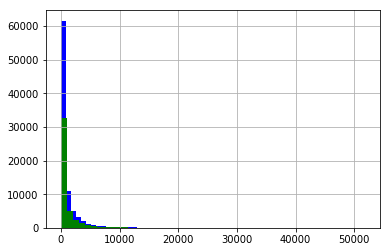

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    
    plt.figure()
    turnstile_weather[turnstile_weather.rain==0]['ENTRIESn_hourly'].hist(bins=50,color="b")
    turnstile_weather[turnstile_weather.rain==1]['ENTRIESn_hourly'].hist(bins=50,color="g")
    return plt
df = pd.read_csv('turnstile_data_master_with_weather.csv')
entries_histogram(df).show()

### *Exercise 2.7

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

** Answer **: The data is right-skewed for both when it is raining or when it is not. However, on days when it is raining, the hourly usage of the subway decreases roughly by half of what it is when it is not raining.

### *Exercise 2.8

Build a function that returns:

1. The mean of entries when it's raining
2. The mean of entries when it's not raining




In [124]:
import pandas as pd
import numpy as np

def means(turnstile_weather):
    with_rain = []
    without_rain = []
    df = pd.read_csv(turnstile_weather)
    df = df[['rain','ENTRIESn_hourly']]
    for index, entry in df.iterrows():
        if entry['rain'].astype(int) == 1:
            with_rain.append(entry['ENTRIESn_hourly'])
        else:
            without_rain.append(entry['ENTRIESn_hourly'])
            
    with_rain_mean = np.mean(with_rain)
    without_rain_mean = np.mean(without_rain)
    return with_rain_mean, without_rain_mean # leave this line for the grader
means('turnstile_data_master_with_weather.csv')

(1105.4463767458733, 1090.278780151855)

Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?


** Answer **:
1. The mean of entries when it's raining is 1105.4463767458733.
2. The mean of entries when it's not raining is 1090.278780151855.

## Exercise 3 - Map Reduce

### *Exercise 3.1*

The entry for this exercise is the same file from the previous session (Exercise 2). You can download the file from this link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code bellow.




In [21]:
import sys

def mapper():
    for line in sys.stdin:
        data = line.strip().split(',')
        if data[1]=='UNIT':
            continue
        UNIT=data[1]
        ENTRIESn_hourly=data[6]
        print "{0}\t{1}".format(UNIT,ENTRIESn_hourly)

sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()

### *Exercise 3.2*

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [20]:
import sys

def reducer():
    oldUnit = None
    totalEntries = 0
    for line in sys.stdin:
        data = line.strip().split("\t")
        if len(data) != 2:
            #Error
            continue
        thisUnit, thisEntry = data
        if oldUnit and oldUnit != thisUnit:
            print oldUnit, "\t", totalEntries
            oldUnit = thisEntry;
            totalEntries = 0
        oldUnit = thisUnit
        totalEntries += float(thisEntry)
    if oldUnit != None:
        print oldUnit, "\t", totalEntries
        
sys.stdin = open('mapper_result.txt')
sys.stdout = open('reducer_result.txt', 'w')
reducer()